In [13]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

import numpy as np
from numpy import pi
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, IBMQ
from qiskit import transpile, schedule, assemble, execute
from qiskit.providers.aer import QasmSimulator
from qiskit.test.mock import FakeAlmaden

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

# simulators:
f_alma = FakeAlmaden() # simulator f_alma for pulse schedules

ibmqfactory.load_account:WARNING:2021-05-14 13:09:59,202: Credentials are already in use. The existing account in the session will be replaced.


# What if Bob inserts the measurement at some other position in the circuit?

In [14]:
def insert_bob_measurement(circ):
    circ.barrier()
    circ.cx(5,6)
    circ.h(5)
    circ.measure(5,5)
    circ.measure(6,6)
    circ.barrier()

Position 0:
	Fidelity q6	 6.25%
	Fidelity q5	 2.48%


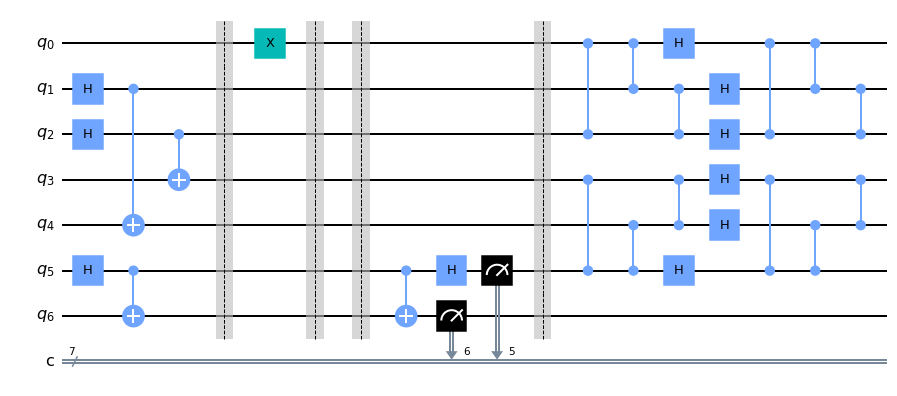

In [15]:
# test bob measurements at other points: position 0

n = 7
qr = QuantumRegister(n, name="q")
cl = ClassicalRegister(n, name="c")
circ = QuantumCircuit(qr,cl)

circ.h(1)
circ.cx(1,4)
circ.h(2)
circ.cx(2,3)
circ.h(5)
circ.cx(5,6)

# initialize alice in |1>
circ.barrier()
circ.x(0)
circ.barrier()

##### telpo 

# 0 
###########################################
insert_bob_measurement(circ)
###########################################

# 1 apply scrambling unitary U
circ.cz(0,2)
# 1 apply conjugate of U
circ.cz(3,5)

# 2 apply scrambling unitary U
circ.cz(0,1)
# 2 apply conjugate of U
circ.cz(4,5)

# 3 apply scrambling unitary U
circ.cz(1,2)
# 3 apply conjugate of U
circ.cz(3,4)

# 4 apply scrambling unitary U
circ.h(0)
# 4 apply conjugate of U
circ.h(3)

# 5 apply scrambling unitary U
circ.h(1)
# 5 apply conjugate of U
circ.h(4)

# 6 apply scrambling unitary U
circ.h(2)
# 6 apply conjugate of U
circ.h(5)

# 7 apply scrambling unitary U
circ.cz(0,2)
# 7 apply conjugate of U
circ.cz(3,5)

# 8 apply scrambling unitary U
circ.cz(0,1)
# 8 apply conjugate of U
circ.cz(4,5)

# 9 apply scrambling unitary U
circ.cz(1,2)
# 9 apply conjugate of U
circ.cz(3,4)

# run on sim
shots = 10000
qobj = assemble(circ, shots=shots)
result = f_alma.run(qobj).result().get_counts()
bob_meas_1 = sum([v for (k,v) in result.items() if k[0]=="1"])
bob_meas_0 = sum([v for (k,v) in result.items() if k[0]=="0"])
q5_meas1 = sum([v for (k,v) in result.items() if k[1]=="1"])
q5_meas0 = sum([v for (k,v) in result.items() if k[1]=="0"])
print("Position 0:")
print("\tFidelity q6\t {}%".format(bob_meas_1/100)) 
print("\tFidelity q5\t {}%".format(q5_meas1/100)) 

circ.draw('mpl')

Position 1:
	Fidelity q6	 6.37%
	Fidelity q5	 46.82%


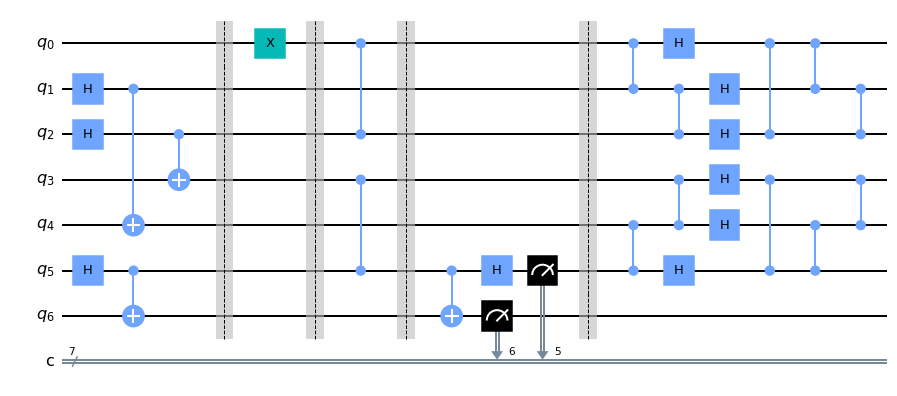

In [16]:
# test bob measurements at other points: position 1

n = 7
circ = QuantumCircuit(n,n)

circ.h(1)
circ.cx(1,4)
circ.h(2)
circ.cx(2,3)
circ.h(5)
circ.cx(5,6)

# initialize alice in |1>
circ.barrier()
circ.x(0)
circ.barrier()

##### telpo 

# 1 apply scrambling unitary U
circ.cz(0,2)
# 1 apply conjugate of U
circ.cz(3,5)

###########################################
insert_bob_measurement(circ)
###########################################

# 2 apply scrambling unitary U
circ.cz(0,1)
# 2 apply conjugate of U
circ.cz(4,5)

# 3 apply scrambling unitary U
circ.cz(1,2)
# 3 apply conjugate of U
circ.cz(3,4)

# 4 apply scrambling unitary U
circ.h(0)
# 4 apply conjugate of U
circ.h(3)

# 5 apply scrambling unitary U
circ.h(1)
# 5 apply conjugate of U
circ.h(4)

# 6 apply scrambling unitary U
circ.h(2)
# 6 apply conjugate of U
circ.h(5)

# 7 apply scrambling unitary U
circ.cz(0,2)
# 7 apply conjugate of U
circ.cz(3,5)

# 8 apply scrambling unitary U
circ.cz(0,1)
# 8 apply conjugate of U
circ.cz(4,5)

# 9 apply scrambling unitary U
circ.cz(1,2)
# 9 apply conjugate of U
circ.cz(3,4)

# run on sim
shots = 10000
qobj = assemble(circ, shots=shots)
result = f_alma.run(qobj).result().get_counts()
bob_meas_1 = sum([v for (k,v) in result.items() if k[0]=="1"])
bob_meas_0 = sum([v for (k,v) in result.items() if k[0]=="0"])
q5_meas1 = sum([v for (k,v) in result.items() if k[1]=="1"])
q5_meas0 = sum([v for (k,v) in result.items() if k[1]=="0"])
print("Position 1:")
print("\tFidelity q6\t {}%".format(bob_meas_1/100)) 
print("\tFidelity q5\t {}%".format(q5_meas1/100)) 

circ.draw('mpl')

In [ ]:
# test bob measurements at other points: position 2

n = 7
circ = QuantumCircuit(n,n)

circ.h(1)
circ.cx(1,4)
circ.h(2)
circ.cx(2,3)
circ.h(5)
circ.cx(5,6)

# initialize alice in |1>
circ.barrier()
circ.x(0)
circ.barrier()

##### telpo 

# 1 apply scrambling unitary U
circ.cz(0,2)
# 1 apply conjugate of U
circ.cz(3,5)

# 2 apply scrambling unitary U
circ.cz(0,1)
# 2 apply conjugate of U
circ.cz(4,5)

###########################################
insert_bob_measurement(circ)
###########################################

# 3 apply scrambling unitary U
circ.cz(1,2)
# 3 apply conjugate of U
circ.cz(3,4)

# 4 apply scrambling unitary U
circ.h(0)
# 4 apply conjugate of U
circ.h(3)

# 5 apply scrambling unitary U
circ.h(1)
# 5 apply conjugate of U
circ.h(4)

# 6 apply scrambling unitary U
circ.h(2)
# 6 apply conjugate of U
circ.h(5)

# 7 apply scrambling unitary U
circ.cz(0,2)
# 7 apply conjugate of U
circ.cz(3,5)

# 8 apply scrambling unitary U
circ.cz(0,1)
# 8 apply conjugate of U
circ.cz(4,5)

# 9 apply scrambling unitary U
circ.cz(1,2)
# 9 apply conjugate of U
circ.cz(3,4)

# run on sim
shots = 10000
qobj = assemble(circ, shots=shots)
result = f_alma.run(qobj).result().get_counts()
bob_meas_1 = sum([v for (k,v) in result.items() if k[0]=="1"])
bob_meas_0 = sum([v for (k,v) in result.items() if k[0]=="0"])
q5_meas1 = sum([v for (k,v) in result.items() if k[1]=="1"])
q5_meas0 = sum([v for (k,v) in result.items() if k[1]=="0"])
print("Position 2:")
print("\tFidelity q6\t {}%".format(bob_meas_1/100)) 
print("\tFidelity q5\t {}%".format(q5_meas1/100)) 

circ.draw('mpl')

Position 2:
	Fidelity q6	 6.22%
	Fidelity q5	 46.67%


In [ ]:
# test bob measurements at other points: position 3

n = 7
circ = QuantumCircuit(n,n)

circ.h(1)
circ.cx(1,4)
circ.h(2)
circ.cx(2,3)
circ.h(5)
circ.cx(5,6)

# initialize alice in |1>
circ.barrier()
circ.x(0)
circ.barrier()

##### telpo 


# 1 apply scrambling unitary U
circ.cz(0,2)
# 1 apply conjugate of U
circ.cz(3,5)

# 2 apply scrambling unitary U
circ.cz(0,1)
# 2 apply conjugate of U
circ.cz(4,5)

# 3 apply scrambling unitary U
circ.cz(1,2)
# 3 apply conjugate of U
circ.cz(3,4)

###########################################
insert_bob_measurement(circ)
###########################################

# 4 apply scrambling unitary U
circ.h(0)
# 4 apply conjugate of U
circ.h(3)

# 5 apply scrambling unitary U
circ.h(1)
# 5 apply conjugate of U
circ.h(4)

# 6 apply scrambling unitary U
circ.h(2)
# 6 apply conjugate of U
circ.h(5)

# 7 apply scrambling unitary U
circ.cz(0,2)
# 7 apply conjugate of U
circ.cz(3,5)

# 8 apply scrambling unitary U
circ.cz(0,1)
# 8 apply conjugate of U
circ.cz(4,5)

# 9 apply scrambling unitary U
circ.cz(1,2)
# 9 apply conjugate of U
circ.cz(3,4)

# run on sim
shots = 10000
qobj = assemble(circ, shots=shots)
result = f_alma.run(qobj).result().get_counts()
bob_meas_1 = sum([v for (k,v) in result.items() if k[0]=="1"])
bob_meas_0 = sum([v for (k,v) in result.items() if k[0]=="0"])
q5_meas1 = sum([v for (k,v) in result.items() if k[1]=="1"])
q5_meas0 = sum([v for (k,v) in result.items() if k[1]=="0"])
print("Position 3:")
print("\tFidelity q6\t {}%".format(bob_meas_1/100)) 
print("\tFidelity q5\t {}%".format(q5_meas1/100)) 

circ.draw('mpl')

In [ ]:
# test bob measurements at other points: position 4

n = 7
circ = QuantumCircuit(n,n)

circ.h(1)
circ.cx(1,4)
circ.h(2)
circ.cx(2,3)
circ.h(5)
circ.cx(5,6)

# initialize alice in |1>
circ.barrier()
circ.x(0)
circ.barrier()

##### telpo 

# 1 apply scrambling unitary U
circ.cz(0,2)
# 1 apply conjugate of U
circ.cz(3,5)

# 2 apply scrambling unitary U
circ.cz(0,1)
# 2 apply conjugate of U
circ.cz(4,5)

# 3 apply scrambling unitary U
circ.cz(1,2)
# 3 apply conjugate of U
circ.cz(3,4)

# 4 apply scrambling unitary U
circ.h(0)
# 4 apply conjugate of U
circ.h(3)

###########################################
insert_bob_measurement(circ)
###########################################

# 5 apply scrambling unitary U
circ.h(1)
# 5 apply conjugate of U
circ.h(4)

# 6 apply scrambling unitary U
circ.h(2)
# 6 apply conjugate of U
circ.h(5)

# 7 apply scrambling unitary U
circ.cz(0,2)
# 7 apply conjugate of U
circ.cz(3,5)

# 8 apply scrambling unitary U
circ.cz(0,1)
# 8 apply conjugate of U
circ.cz(4,5)

# 9 apply scrambling unitary U
circ.cz(1,2)
# 9 apply conjugate of U
circ.cz(3,4)

# run on sim
shots = 10000
qobj = assemble(circ, shots=shots)
result = f_alma.run(qobj).result().get_counts()
bob_meas_1 = sum([v for (k,v) in result.items() if k[0]=="1"])
bob_meas_0 = sum([v for (k,v) in result.items() if k[0]=="0"])
q5_meas1 = sum([v for (k,v) in result.items() if k[1]=="1"])
q5_meas0 = sum([v for (k,v) in result.items() if k[1]=="0"])
print("Position 4:")
print("\tFidelity q6\t {}%".format(bob_meas_1/100)) 
print("\tFidelity q5\t {}%".format(q5_meas1/100)) 

circ.draw('mpl')

In [ ]:
# test bob measurements at other points: position 5

n = 7
circ = QuantumCircuit(n,n)

circ.h(1)
circ.cx(1,4)
circ.h(2)
circ.cx(2,3)
circ.h(5)
circ.cx(5,6)

# initialize alice in |1>
circ.barrier()
circ.x(0)
circ.barrier()

##### telpo 

# 1 apply scrambling unitary U
circ.cz(0,2)
# 1 apply conjugate of U
circ.cz(3,5)

# 2 apply scrambling unitary U
circ.cz(0,1)
# 2 apply conjugate of U
circ.cz(4,5)

# 3 apply scrambling unitary U
circ.cz(1,2)
# 3 apply conjugate of U
circ.cz(3,4)

# 4 apply scrambling unitary U
circ.h(0)
# 4 apply conjugate of U
circ.h(3)

# 5 apply scrambling unitary U
circ.h(1)
# 5 apply conjugate of U
circ.h(4)

###########################################
insert_bob_measurement(circ)
###########################################

# 6 apply scrambling unitary U
circ.h(2)
# 6 apply conjugate of U
circ.h(5)

# 7 apply scrambling unitary U
circ.cz(0,2)
# 7 apply conjugate of U
circ.cz(3,5)

# 8 apply scrambling unitary U
circ.cz(0,1)
# 8 apply conjugate of U
circ.cz(4,5)

# 9 apply scrambling unitary U
circ.cz(1,2)
# 9 apply conjugate of U
circ.cz(3,4)

# run on sim
shots = 10000
qobj = assemble(circ, shots=shots)
result = f_alma.run(qobj).result().get_counts()
bob_meas_1 = sum([v for (k,v) in result.items() if k[0]=="1"])
bob_meas_0 = sum([v for (k,v) in result.items() if k[0]=="0"])
q5_meas1 = sum([v for (k,v) in result.items() if k[1]=="1"])
q5_meas0 = sum([v for (k,v) in result.items() if k[1]=="0"])
print("Position 5:")
print("\tFidelity q6\t {}%".format(bob_meas_1/100)) 
print("\tFidelity q5\t {}%".format(q5_meas1/100)) 

circ.draw('mpl')

In [ ]:
# test bob measurements at other points: position 6

n = 7
circ = QuantumCircuit(n,n)

circ.h(1)
circ.cx(1,4)
circ.h(2)
circ.cx(2,3)
circ.h(5)
circ.cx(5,6)

# initialize alice in |1>
circ.barrier()
circ.x(0)
circ.barrier()

##### telpo 

# 1 apply scrambling unitary U
circ.cz(0,2)
# 1 apply conjugate of U
circ.cz(3,5)

# 2 apply scrambling unitary U
circ.cz(0,1)
# 2 apply conjugate of U
circ.cz(4,5)

# 3 apply scrambling unitary U
circ.cz(1,2)
# 3 apply conjugate of U
circ.cz(3,4)

# 4 apply scrambling unitary U
circ.h(0)
# 4 apply conjugate of U
circ.h(3)

# 5 apply scrambling unitary U
circ.h(1)
# 5 apply conjugate of U
circ.h(4)

# 6 apply scrambling unitary U
circ.h(2)
# 6 apply conjugate of U
circ.h(5)

###########################################
insert_bob_measurement(circ)
###########################################

# 7 apply scrambling unitary U
circ.cz(0,2)
# 7 apply conjugate of U
circ.cz(3,5)

# 8 apply scrambling unitary U
circ.cz(0,1)
# 8 apply conjugate of U
circ.cz(4,5)

# 9 apply scrambling unitary U
circ.cz(1,2)
# 9 apply conjugate of U
circ.cz(3,4)

# run on sim
shots = 10000
qobj = assemble(circ, shots=shots)
result = f_alma.run(qobj).result().get_counts()
bob_meas_1 = sum([v for (k,v) in result.items() if k[0]=="1"])
bob_meas_0 = sum([v for (k,v) in result.items() if k[0]=="0"])
q5_meas1 = sum([v for (k,v) in result.items() if k[1]=="1"])
q5_meas0 = sum([v for (k,v) in result.items() if k[1]=="0"])
print("Position 6:")
print("\tFidelity q6\t {}%".format(bob_meas_1/100)) 
print("\tFidelity q5\t {}%".format(q5_meas1/100)) 

circ.draw('mpl')

In [ ]:
# test bob measurements at other points: position 7

n = 7
circ = QuantumCircuit(n,n)

circ.h(1)
circ.cx(1,4)
circ.h(2)
circ.cx(2,3)
circ.h(5)
circ.cx(5,6)

# initialize alice in |1>
circ.barrier()
circ.x(0)
circ.barrier()

##### telpo 

# 1 apply scrambling unitary U
circ.cz(0,2)
# 1 apply conjugate of U
circ.cz(3,5)

# 2 apply scrambling unitary U
circ.cz(0,1)
# 2 apply conjugate of U
circ.cz(4,5)

# 3 apply scrambling unitary U
circ.cz(1,2)
# 3 apply conjugate of U
circ.cz(3,4)

# 4 apply scrambling unitary U
circ.h(0)
# 4 apply conjugate of U
circ.h(3)

# 5 apply scrambling unitary U
circ.h(1)
# 5 apply conjugate of U
circ.h(4)

# 6 apply scrambling unitary U
circ.h(2)
# 6 apply conjugate of U
circ.h(5)

# 7 apply scrambling unitary U
circ.cz(0,2)
# 7 apply conjugate of U
circ.cz(3,5)

###########################################
insert_bob_measurement(circ)
###########################################

# 8 apply scrambling unitary U
circ.cz(0,1)
# 8 apply conjugate of U
circ.cz(4,5)

# 9 apply scrambling unitary U
circ.cz(1,2)
# 9 apply conjugate of U
circ.cz(3,4)

# run on sim
shots = 10000
qobj = assemble(circ, shots=shots)
result = f_alma.run(qobj).result().get_counts()
bob_meas_1 = sum([v for (k,v) in result.items() if k[0]=="1"])
bob_meas_0 = sum([v for (k,v) in result.items() if k[0]=="0"])
q5_meas1 = sum([v for (k,v) in result.items() if k[1]=="1"])
q5_meas0 = sum([v for (k,v) in result.items() if k[1]=="0"])
print("Position 7:")
print("\tFidelity q6\t {}%".format(bob_meas_1/100)) 
print("\tFidelity q5\t {}%".format(q5_meas1/100)) 

circ.draw('mpl')

In [ ]:
# test bob measurements at other points: position 8

n = 7
circ = QuantumCircuit(n,n)

circ.h(1)
circ.cx(1,4)
circ.h(2)
circ.cx(2,3)
circ.h(5)
circ.cx(5,6)

# initialize alice in |1>
circ.barrier()
circ.x(0)
circ.barrier()

##### telpo 

# 1 apply scrambling unitary U
circ.cz(0,2)
# 1 apply conjugate of U
circ.cz(3,5)

# 2 apply scrambling unitary U
circ.cz(0,1)
# 2 apply conjugate of U
circ.cz(4,5)

# 3 apply scrambling unitary U
circ.cz(1,2)
# 3 apply conjugate of U
circ.cz(3,4)

# 4 apply scrambling unitary U
circ.h(0)
# 4 apply conjugate of U
circ.h(3)

# 5 apply scrambling unitary U
circ.h(1)
# 5 apply conjugate of U
circ.h(4)

# 6 apply scrambling unitary U
circ.h(2)
# 6 apply conjugate of U
circ.h(5)

# 7 apply scrambling unitary U
circ.cz(0,2)
# 7 apply conjugate of U
circ.cz(3,5)

# 8 apply scrambling unitary U
circ.cz(0,1)
# 8 apply conjugate of U
circ.cz(4,5)

###########################################
insert_bob_measurement(circ)
###########################################

# 9 apply scrambling unitary U
circ.cz(1,2)
# 9 apply conjugate of U
circ.cz(3,4)

# run on sim
shots = 10000
qobj = assemble(circ, shots=shots)
result = f_alma.run(qobj).result().get_counts()
bob_meas_1 = sum([v for (k,v) in result.items() if k[0]=="1"])
bob_meas_0 = sum([v for (k,v) in result.items() if k[0]=="0"])
q5_meas1 = sum([v for (k,v) in result.items() if k[1]=="1"])
q5_meas0 = sum([v for (k,v) in result.items() if k[1]=="0"])
print("Position 8:")
print("\tFidelity q6\t {}%".format(bob_meas_1/100)) 
print("\tFidelity q5\t {}%".format(q5_meas1/100)) 

circ.draw('mpl')

In [ ]:
# test bob measurements at other points: position 9

n = 7
circ = QuantumCircuit(n,n)

circ.h(1)
circ.cx(1,4)
circ.h(2)
circ.cx(2,3)
circ.h(5)
circ.cx(5,6)

# initialize alice in |1>
circ.barrier()
circ.x(0)
circ.barrier()

##### telpo 

# 1 apply scrambling unitary U
circ.cz(0,2)
# 1 apply conjugate of U
circ.cz(3,5)

# 2 apply scrambling unitary U
circ.cz(0,1)
# 2 apply conjugate of U
circ.cz(4,5)

# 3 apply scrambling unitary U
circ.cz(1,2)
# 3 apply conjugate of U
circ.cz(3,4)

# 4 apply scrambling unitary U
circ.h(0)
# 4 apply conjugate of U
circ.h(3)

# 5 apply scrambling unitary U
circ.h(1)
# 5 apply conjugate of U
circ.h(4)

# 6 apply scrambling unitary U
circ.h(2)
# 6 apply conjugate of U
circ.h(5)

# 7 apply scrambling unitary U
circ.cz(0,2)
# 7 apply conjugate of U
circ.cz(3,5)

# 8 apply scrambling unitary U
circ.cz(0,1)
# 8 apply conjugate of U
circ.cz(4,5)

# 9 apply scrambling unitary U
circ.cz(1,2)
# 9 apply conjugate of U
circ.cz(3,4)

###########################################
insert_bob_measurement(circ)
###########################################

# run on sim
shots = 10000
qobj = assemble(circ, shots=shots)
result = f_alma.run(qobj).result().get_counts()
bob_meas_1 = sum([v for (k,v) in result.items() if k[0]=="1"])
bob_meas_0 = sum([v for (k,v) in result.items() if k[0]=="0"])
q5_meas1 = sum([v for (k,v) in result.items() if k[1]=="1"])
q5_meas0 = sum([v for (k,v) in result.items() if k[1]=="0"])
print("Position 9:")
print("\tFidelity q6\t {}%".format(bob_meas_1/100)) 
print("\tFidelity q5\t {}%".format(q5_meas1/100)) 

circ.draw('mpl')